<a href="https://colab.research.google.com/github/hugo-dc/comp_vs_stor/blob/comp-vs-all/ComputationalVsStorage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Opcodes Gas Usage

This is the result of analyzing a file generated using a modified version of the Erigon `state` command. This command outputs a trace of all transactions in a block, showing all opcodes except for the following considered as Storage Opcodes:

- SLOAD - 0x54
- SSTORE - 0x55
- CALL - 0xf1
- CALLCODE - 0xf2
- DELEATECALL - 0xf4
- STATICCALL - 0xfa
- BALANCE - 0x31
- SELFBALANCE - 0x47
- EXTCODESIZE - 0x3b
- EXTCODECOPY - 0x3c
- EXTCODEHASH - 0x3f
- SELFDESTRUCT - 0xff

Using the resulting log data, a csv file is generated with the sum of the cost of all Computational Opcodes, this document compares the Computational Opcodes gas usage in 68667 blocks (from block 12000028 12069718) against **the total gas used**, resulting in about 13.83% gas corresponding to Computational Opcodes.



In [1]:
import pandas as pd

In [2]:
INPUT_FILE = '/content/sample_data/comp_opcodes_usage.csv'
FSIZE = (16, 16)
columns = ['BlockNumber', 'GasUsed', 'CompGasUsed', 'CompGasUsedPerc']

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) + "%" if pct > 0 else ''

In [3]:
df = pd.read_csv(INPUT_FILE, names=columns)
df

,BlockNumber,GasUsed,CompGasUsed,CompGasUsedPerc
0,12000028,12477997,3043024,24.39
1,12000029,12481344,1917400,15.36
2,12000030,12441408,2285524,18.37
3,12000031,12510734,2056188,16.44
4,12000032,12497075,1549676,12.40
...,...,...,...,...
259297,12262697,12390037,2076024,16.76
259298,12262698,12415503,1447376,11.66
259299,12262699,12410210,1984732,15.99
259300,12262700,12433439,2286898,18.39


In [4]:
avg_gas_used = df['GasUsed'].mean()
avg_gas_used

12462423.559845276

In [5]:
avg_comp_gas_used = df['CompGasUsed'].mean()
avg_comp_gas_used

1723255.1112023818

In [6]:
df['CompGasUsedPerc'].mean()

13.826440096875332

In [7]:
df['StorGasUsed'] = df['GasUsed'] - df['CompGasUsed']

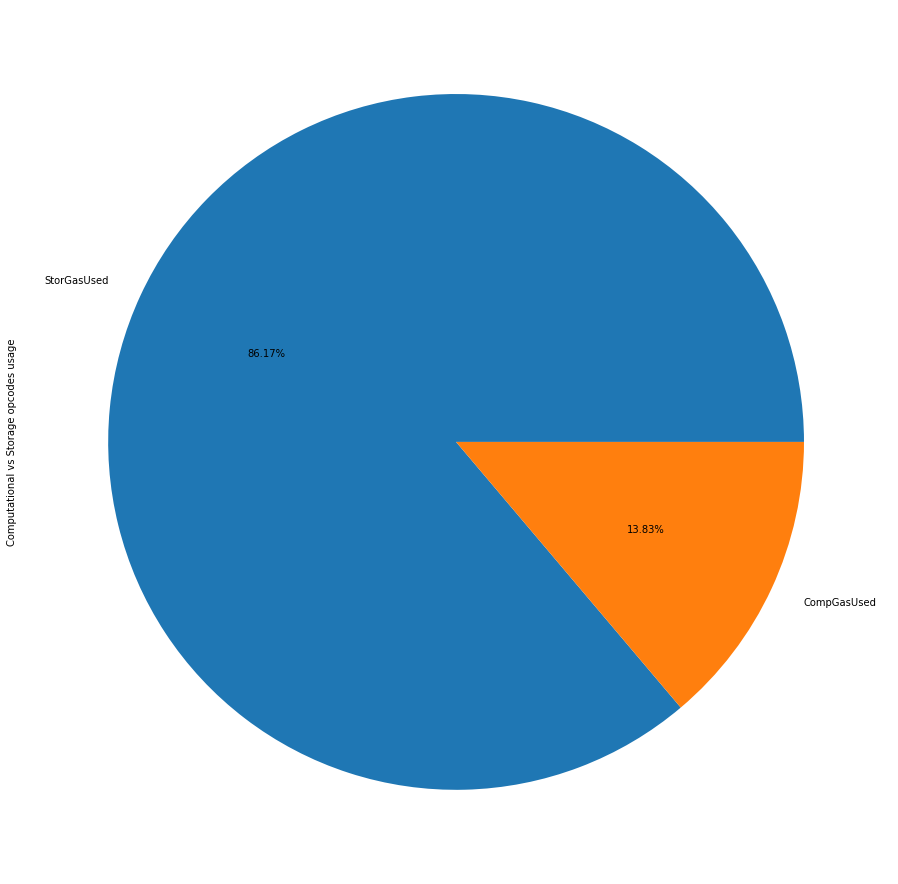

In [8]:
df[['StorGasUsed', 'CompGasUsed']].sum().plot(kind='pie', label='Computational vs Storage opcodes usage', figsize=FSIZE, autopct=autopct)